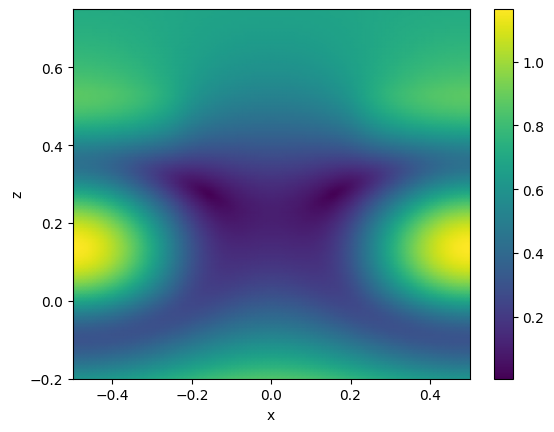

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

"""
Dielectric array, with permittivity 12.
Period is 1
Each rod has side length 0.55.

 → x
↓z    ___     ___
...  |   |   |   |  ...
      ¯¯¯     ¯¯¯
"""

from inkstone import Inkstone
import numpy as np

s = Inkstone()
s.lattice = 1
s.num_g = 30
s.frequency = 0.4

s.AddMaterial(name='di', epsilon=12)

s.AddLayer(name='in', thickness=0, material_background='vacuum')
d = 0.55
s.AddLayer(name='slab', thickness=d, material_background='di')
s.AddLayerCopy(name='out', original_layer='in', thickness=0)

s.AddPattern1D(layer='slab', pattern_name='box', material='vacuum', width=0.45, center=0)

s.SetExcitation(theta=0., phi=0., s_amplitude=1, p_amplitude=0)


Ex, Ey, Ez, Hx, Hy, Hz = s.GetFields(xmin=-0.5, xmax=0.5, nx=101,
                                     y=0,
                                     zmin=-0.2, zmax=d+0.2, nz=101)

#%% plotting
from matplotlib import pyplot as plt
plt.pcolormesh(np.linspace(-0.5, 0.5, 101),
               np.linspace(-0.2, d+0.2, 101),
               np.abs(Ey[0, :, :]).T,
               shading='gouraud')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()